105405132 廣告四 宋靜

# 載入套件(FNN、CNN)&資料集

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [8]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 匯入CIFAR 10

In [9]:
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

#標準化 
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

170500096/170498071 [==============================] - 69s 0us/step


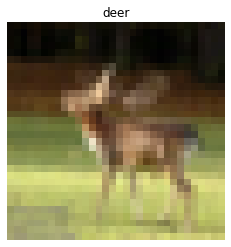

In [10]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

修改部分：<br>filter改為16 64 256<br>神經元下修至128

In [11]:
CNN_layers = [Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         147712    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [13]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['categorical_accuracy'])

修改：batch_size = 80；模型訓練3次

In [14]:
model_2.fit(X_train, y_train, 
          batch_size=100, 
          epochs=3,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.8363 - categorical_accuracy: 0.3003 - val_loss: 1.6449 - val_categorical_accuracy: 0.3830
Epoch 2/3
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.5729 - categorical_accuracy: 0.4149 - val_loss: 1.4702 - val_categorical_accuracy: 0.4539
Epoch 3/3
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.4040 - categorical_accuracy: 0.4876 - val_loss: 1.3424 - val_categorical_accuracy: 0.5062


In [16]:
score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')


10000/10000 [==============================] - 6s 576us/sample - loss: 1.3424 - categorical_accuracy: 0.5062
Train Accuracy: 51.28999948501587
Test Accuracy: 50.620001554489136


回頭check舊模型的準確率

In [17]:
score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 6s 580us/sample - loss: 1.3424 - categorical_accuracy: 0.5062
Train Accuracy: 51.28999948501587
Test Accuracy: 50.620001554489136
